# <a id='toc1_'></a>[Table of contents](#toc0_)

<a id='toc0_'></a>    
- [Table of contents](#toc1_)    
- [Data Preprocessing](#toc2_)    
  - [Checking data](#toc2_1_)    
  - [Handling missing values and converting to numeric types](#toc2_2_)    
- [Analysis](#toc3_)    
  - [Rating Trends Over Years:](#toc3_1_)    
  - [Genre Popularity Analysis:](#toc3_2_)    
  - [Director’s Impact on Ratings:](#toc3_3_)    
  - [Star Power Analysis:](#toc3_4_)    
  - [Box Plot of Genres vs. Ratings:](#toc3_5_)    
  - [Correlation Heatmap:](#toc3_6_)    
- [Conclusions](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Data Preprocessing](#toc0_)

In [20]:
!kaggle datasets download -d harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows -p ./ --unzip

Dataset URL: https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows
License(s): CC0-1.0




  0%|          | 0.00/175k [00:00<?, ?B/s]
100%|██████████| 175k/175k [00:00<00:00, 444kB/s]
100%|██████████| 175k/175k [00:00<00:00, 444kB/s]


In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


imdb_data = pd.read_csv('imdb_top_1000.csv')
imdb_data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


## <a id='toc2_1_'></a>[Checking data](#toc0_)

In [22]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [23]:
imdb_data.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


## <a id='toc2_2_'></a>[Handling missing values and converting to numeric types](#toc0_)

In [24]:
# Remove commas from 'Gross' and convert to numeric, handling missing values
imdb_data['Gross'] = imdb_data['Gross'].str.replace(',', '').astype(float)

# Convert 'Released_Year' to numeric, coercing errors for possible non-numeric values
imdb_data['Released_Year'] = pd.to_numeric(imdb_data['Released_Year'], errors='coerce')

# Convert 'Runtime' to numeric (extracting the numeric part from strings like "142 min")
imdb_data['Runtime'] = imdb_data['Runtime'].str.extract('(\d+)').astype(float)


# Fill missing 'Meta_score' and 'Gross' values with the mean as an imputation strategy
imdb_data['Meta_score'].fillna(imdb_data['Meta_score'].mean(), inplace=True)
imdb_data['Gross'].fillna(imdb_data['Gross'].mean(), inplace=True)


imdb_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  999 non-null    float64
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   float64
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          1000 non-null   float64
dtypes: float64(5), int64(1), object(10)
memory usage: 125.1+ KB


<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
C:\Users\d1411\AppData\Local\Temp\ipykernel_35900\2830799097.py:8: SyntaxWarning: invalid escape sequence '\d'
  imdb_data['Runtime'] = imdb_data['Runtime'].str.extract('(\d+)').astype(float)
C:\Users\d1411\AppData\Local\Temp\ipykernel_35900\2830799097.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  imdb_data['Meta_score'].fillna(imdb_data['Meta_score'].mean(), inplace=True)
C:\Users\d1411\AppData\Local\Temp\ipykernel_35900

In [25]:
imdb_data.dropna(subset=['Released_Year'], inplace=True)

In [26]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    999 non-null    object 
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    float64
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    float64
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     999 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          999 non-null    float64
dtypes: float64(5), int64(1), object(10)
memory usage: 132.7+ KB


# <a id='toc3_'></a>[Analysis](#toc0_)

## <a id='toc3_1_'></a>[Rating Trends Over Years:](#toc0_)

Create a line plot with Matplotlib showing trends in IMDB_Rating over the years.

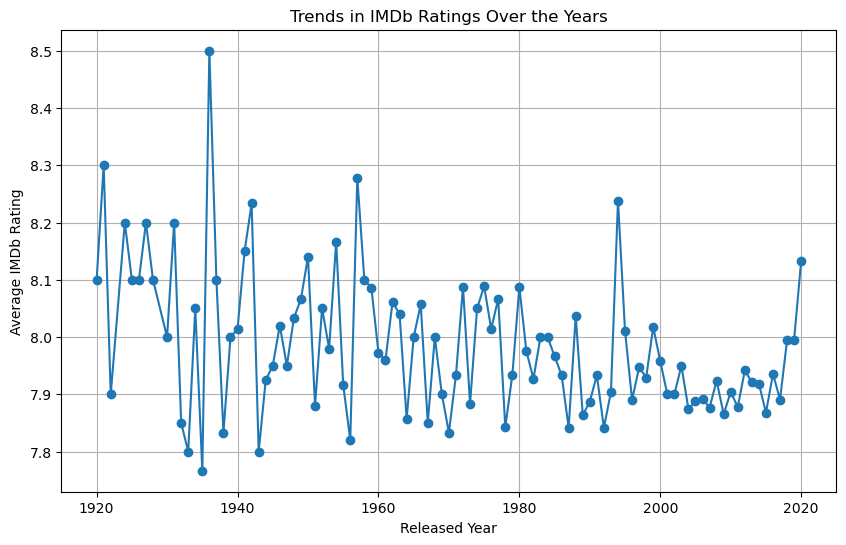

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(imdb_data.groupby('Released_Year')['IMDB_Rating'].mean(), marker='o')
plt.title('Trends in IMDb Ratings Over the Years')
plt.xlabel('Released Year')
plt.ylabel('Average IMDb Rating')
plt.grid(True)
plt.show()

## <a id='toc3_2_'></a>[Genre Popularity Analysis:](#toc0_)

Generate a Seaborn bar plot to compare the number of movies across different genres.

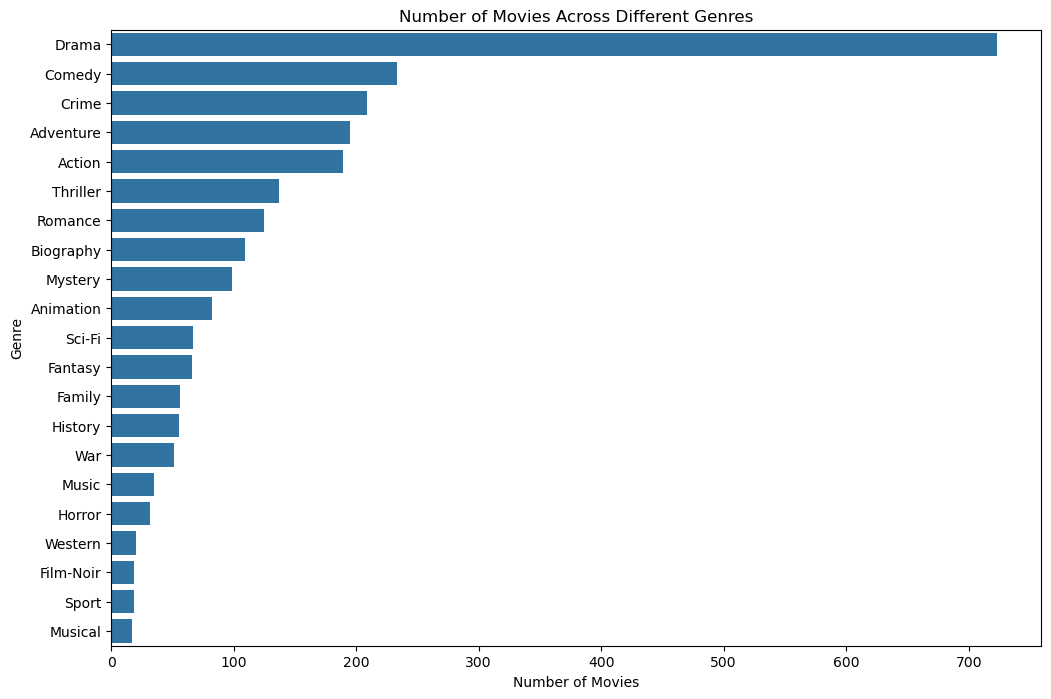

In [29]:
# Split genres as some movies belong to multiple genres
# Create a new dataframe to handle the genre split
genre_data = imdb_data.copy()
genre_data['Genre'] = genre_data['Genre'].str.split(', ')

# Create a new exploded dataframe where each genre has its own row
exploded_genre_data = genre_data.explode('Genre')


plt.figure(figsize=(12, 8))
sns.countplot(y='Genre', data=exploded_genre_data, order=exploded_genre_data['Genre'].value_counts().index)
plt.title('Number of Movies Across Different Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

## <a id='toc3_3_'></a>[Director’s Impact on Ratings:](#toc0_)

Use a Matplotlib scatter plot to examine the relationship between directors and movie ratings.

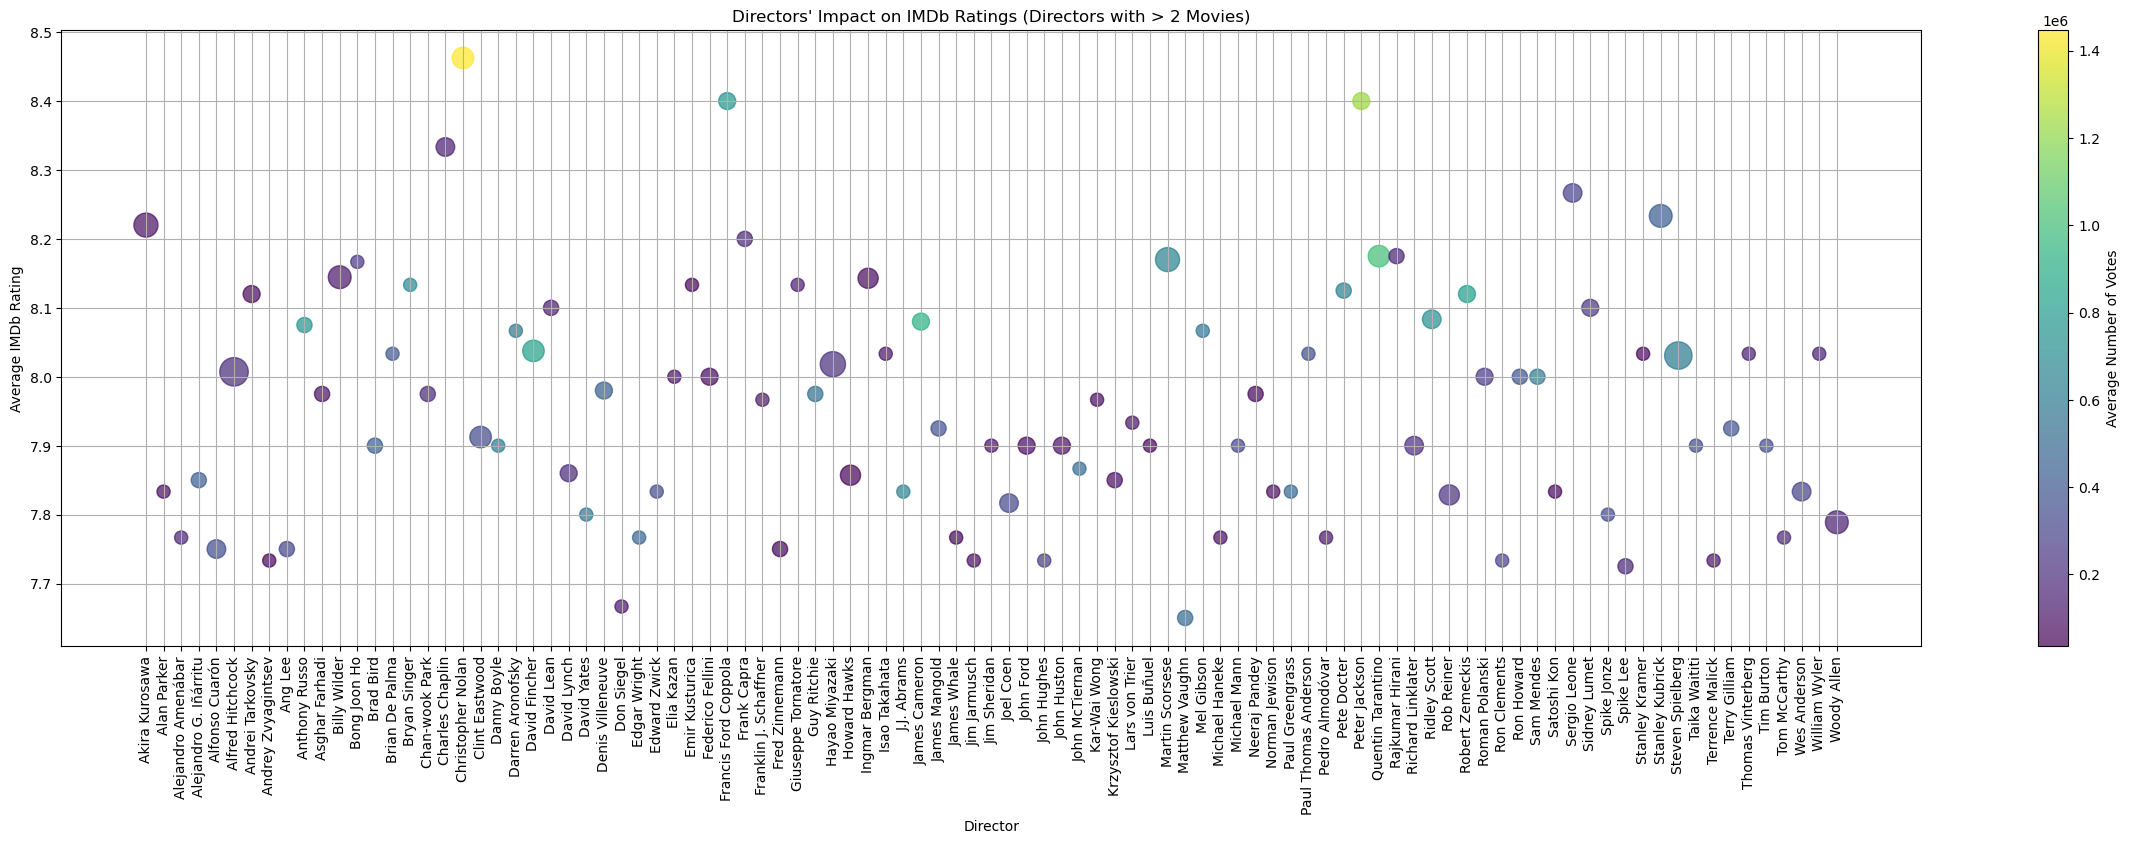

In [35]:
# Group data by Director and calculate the mean IMDb rating and count of movies per director
director_group = imdb_data.groupby('Director').agg({
    'IMDB_Rating': 'mean',
    'No_of_Votes': 'mean',  # Average number of votes to represent popularity
    'Gross': 'mean',        # Average gross to represent financial success
    'Series_Title': 'count'  # Number of movies directed
}).reset_index()

# Filter directors with more than 2 movies to reduce clutter
filtered_director_group = director_group[director_group['Series_Title'] > 2]

# Plotting scatter plot with directors' average IMDb ratings and using bubble size to indicate movie count
plt.figure(figsize=(30, 8))
plt.scatter(filtered_director_group['Director'], filtered_director_group['IMDB_Rating'], 
            s=filtered_director_group['Series_Title'] * 30,  # Scale bubble size by number of movies
            c=filtered_director_group['No_of_Votes'], cmap='viridis', alpha=0.7)

# Adding labels and title
plt.xticks(rotation=90)
plt.colorbar(label='Average Number of Votes')
plt.title("Directors' Impact on IMDb Ratings (Directors with > 2 Movies)")
plt.xlabel('Director')
plt.ylabel('Average IMDb Rating')
plt.grid(True)
plt.show()


## <a id='toc3_4_'></a>[Star Power Analysis:](#toc0_)

Employ a Seaborn pairplot to explore relationships involving Stars and their impact on IMDB_Rating and Gross.

<Figure size 1500x800 with 0 Axes>

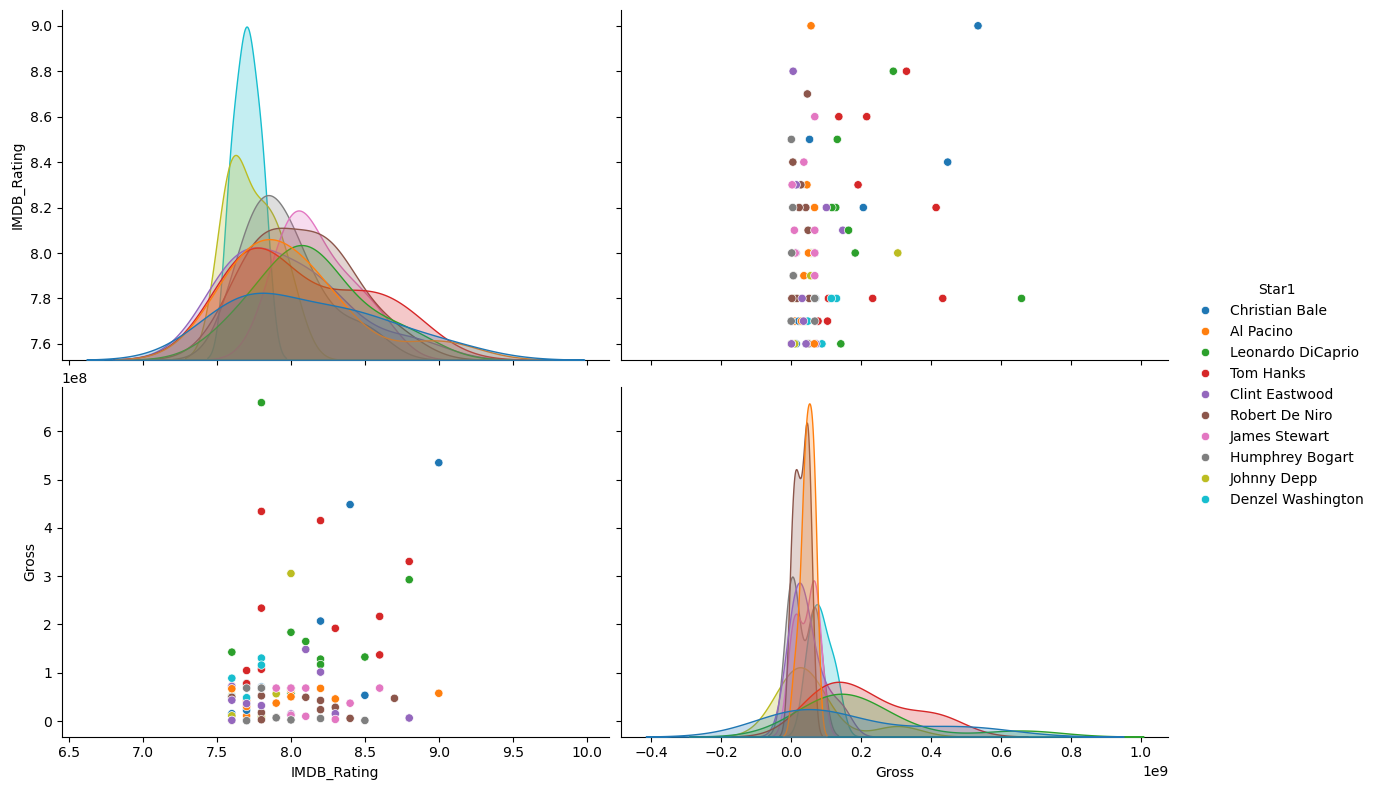

In [41]:
# Counting the number of movies for each star (using Star1 as the main lead)
top_stars = imdb_data['Star1'].value_counts().head(10).index

# Filter the data to only include movies from the top 10 stars
top_stars_data = imdb_data[imdb_data['Star1'].isin(top_stars)]

# Create a pair plot for the top 10 stars showing relationships between IMDb rating and Gross
sns.pairplot(top_stars_data[['Star1', 'IMDB_Rating', 'Gross']], hue='Star1', height=4, aspect=1.5)
plt.show()


## <a id='toc3_5_'></a>[Box Plot of Genres vs. Ratings:](#toc0_)

Visualize the distribution of IMDB_Rating across different Genres using a Seaborn box plot.

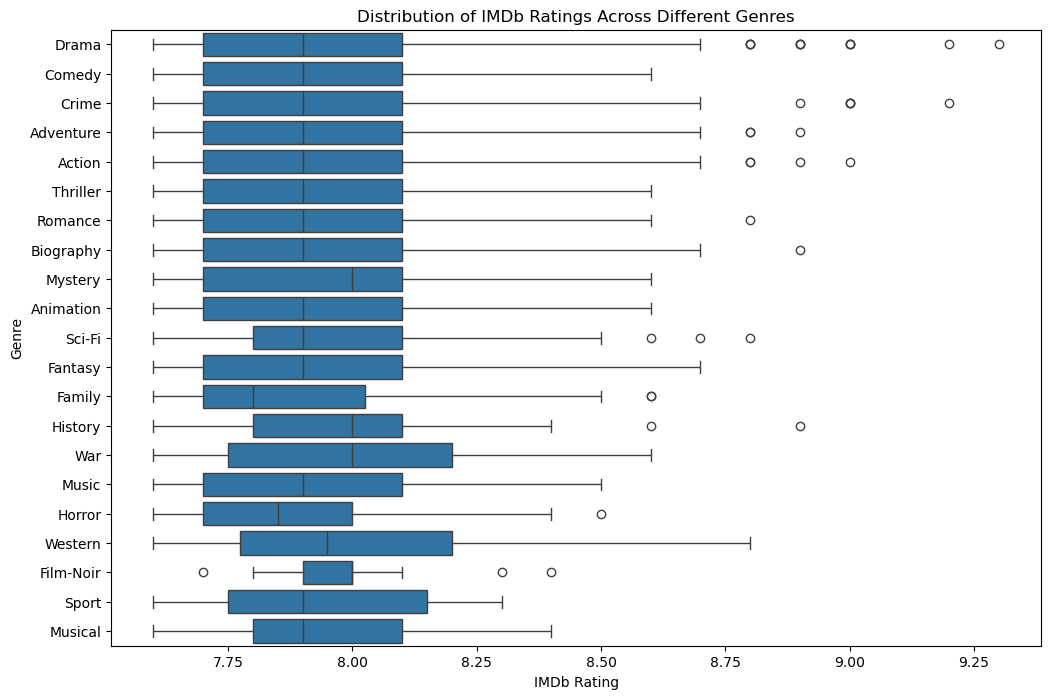

In [42]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='IMDB_Rating', y='Genre', data=exploded_genre_data, order=exploded_genre_data['Genre'].value_counts().index)
plt.title('Distribution of IMDb Ratings Across Different Genres')
plt.xlabel('IMDb Rating')
plt.ylabel('Genre')
plt.show()


## <a id='toc3_6_'></a>[Correlation Heatmap:](#toc0_)

Create a heatmap using Seaborn to identify correlations between numerical columns like IMDB_Rating, Meta_score, No_of_votes, and Gross.


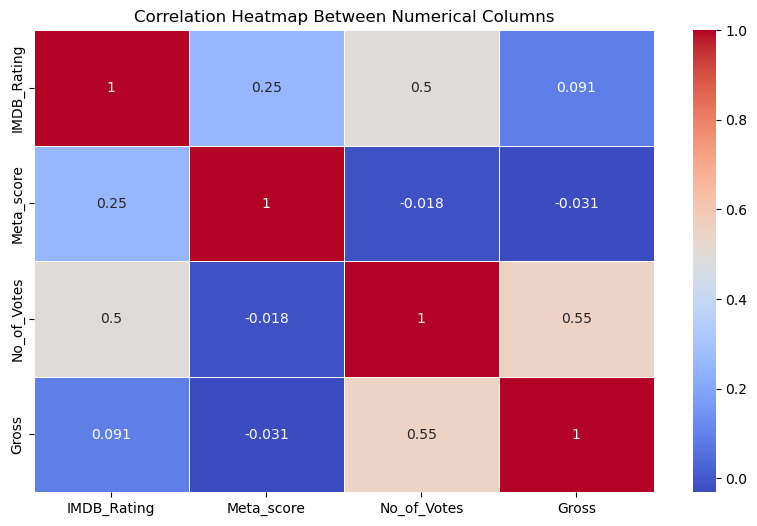

In [43]:
# Correlation heatmap of numerical columns: IMDB_Rating, Meta_score, No_of_votes, and Gross
plt.figure(figsize=(10, 6))
correlation_matrix = imdb_data[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']].corr()

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap Between Numerical Columns')
plt.show()


# <a id='toc4_'></a>[Conclusions](#toc0_)

**Rating Trends Over the Years:**
IMDb ratings fluctuate across decades, with no clear upward or downward trend. Certain years stand out with higher average ratings, possibly due to exceptional movie releases.

**Popular Genres:**
Drama, Crime, and Action dominate in terms of the number of movies, indicating their broad appeal.

**Director Influence:**
Some directors consistently produce high-rated movies, while others show more variability in their movie ratings.

**Star Power Analysis:**
The top 10 stars, as ranked by the number of movies they starred in, show varying levels of success in terms of IMDb ratings and gross revenue. Financial success (gross) doesn't always correlate directly with critical reception (IMDb rating).

**Correlation Insights:**
A strong positive correlation exists between the number of votes a movie receives and its gross revenue, implying that movies that are more popular or widely seen also tend to earn more. IMDb ratings and Metascore also show a moderate positive correlation, suggesting that critical and audience reviews align to some extent.